In [1]:
!pip install medmnist

In [2]:
from medmnist import BreastMNIST, PneumoniaMNIST, DermaMNIST, BloodMNIST, RetinaMNIST
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import certifi
import os

os.environ['SSL_CERT_FILE'] = certifi.where()

datasets = {
    'RetinaMNIST': RetinaMNIST,
    'BreastMNIST': BreastMNIST,
    'PneumoniaMNIST': PneumoniaMNIST,
    'DermaMNIST': DermaMNIST,
    'BloodMNIST': BloodMNIST
}

records = []
for name, dataset_class in datasets.items():
    train_data = dataset_class(split='train', download=True)
    test_data = dataset_class(split='test', download=True)
    
    X_train, y_train = train_data.imgs, train_data.labels.flatten()
    X_test, y_test = test_data.imgs, test_data.labels.flatten()
    
    n_train, n_test = len(X_train), len(X_test)
    classes_train, counts_train = np.unique(y_train, return_counts=True)
    classes_test, counts_test = np.unique(y_test, return_counts=True)
    train_imbalance = counts_train.max() / counts_train.min()
    test_imbalance = counts_test.max() / counts_test.min()
    
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)
    
    clf = LogisticRegression(random_state=42, max_iter=1000)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))

    print(f"[{name}] Accuracy: {acc:.4f}")
    
    records.append({
        'Dataset': name,
        'Train Samples': n_train,
        'Test Samples': n_test,
        'Train Class Distribution': str(dict(zip(classes_train, counts_train))),
        'Test Class Distribution': str(dict(zip(classes_test, counts_test))),
        'Train Imbalance Ratio': f"{train_imbalance:.2f}:1",
        'Test Imbalance Ratio': f"{test_imbalance:.2f}:1",
        'Accuracy': acc
    })

df = pd.DataFrame(records)
print(df.to_string(index=False))


/Users/marawangamal/Documents/github/ptn/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[RetinaMNIST] Accuracy: 0.4550
[BreastMNIST] Accuracy: 0.7692


/Users/marawangamal/Documents/github/ptn/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[PneumoniaMNIST] Accuracy: 0.8189


/Users/marawangamal/Documents/github/ptn/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[DermaMNIST] Accuracy: 0.6733
[BloodMNIST] Accuracy: 0.8036
       Dataset  Train Samples  Test Samples                                                                                                                                                                                                              Train Class Distribution                                                                                                                                                                                                          Test Class Distribution Train Imbalance Ratio Test Imbalance Ratio  Accuracy
   RetinaMNIST           1080           400                                                                                           {np.uint8(0): np.int64(486), np.uint8(1): np.int64(128), np.uint8(2): np.int64(206), np.uint8(3): np.int64(194), np.uint8(4): np.int64(66)}                                                                                         {np.uint8(0): np.int64(174

/Users/marawangamal/Documents/github/ptn/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


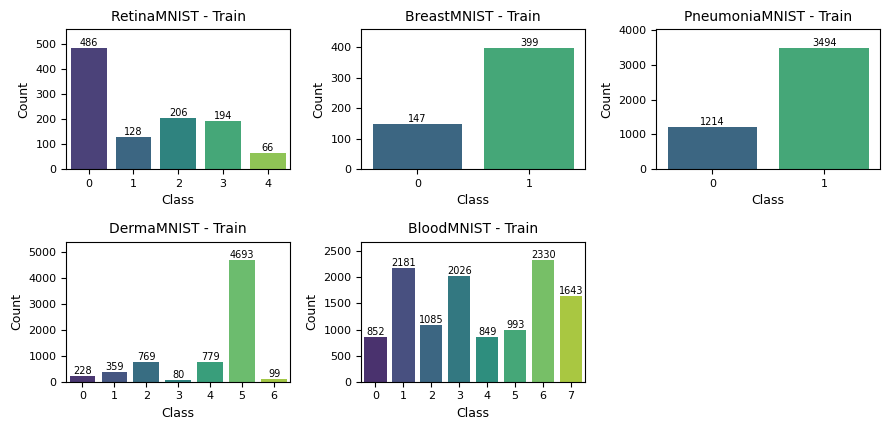


Accuracy Table:
Dataset           Accuracy
--------------------------
RetinaMNIST         0.4550
BreastMNIST         0.7692
PneumoniaMNIST      0.8189
DermaMNIST          0.6733
BloodMNIST          0.8036


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Smaller grid for easier viewing altogether
num_datasets = len(records)
cols = 3  # More columns to make the grid more compact horizontally
rows = (num_datasets + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(9, 2.2 * rows))
axes = axes.flatten() if num_datasets > 1 else [axes]

for i, record in enumerate(records):
    distr = eval(record['Train Class Distribution'])
    labels = [str(k) for k in distr.keys()]
    counts = list(distr.values())
    ax = axes[i]
    # To avoid the warning, use a DataFrame, assign "label" to hue, and set legend=False
    df_ = pd.DataFrame({"Class": labels, "Count": counts})
    sns.barplot(x="Class", y="Count", hue="Class", data=df_, palette="viridis", ax=ax, legend=False)
    ax.set_title(f"{record['Dataset']} - Train", fontsize=10)
    ax.set_xlabel("Class", fontsize=9)
    ax.set_ylabel("Count", fontsize=9)
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=7)
    ax.set_ylim(0, max(counts) * 1.15)
    ax.tick_params(labelsize=8)

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Print table of accuracies
print("\nAccuracy Table:")
print("{:<15} {:>10}".format("Dataset", "Accuracy"))
print("-" * 26)
for record in records:
    print("{:<15} {:>10.4f}".format(record['Dataset'], record['Accuracy']))
